# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

id : A notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of bedrooms

bathrooms: Number of bathrooms

sqft_living: Square footage of the home

sqft_lot: Square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above : Square footage of house apart from basement

sqft_basement: Square footage of the basement

yr_built : Built Year

yr_renovated : Year when house was renovated

zipcode: Zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 : LotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df_house = pd.read_csv(file_name)

I've create some class to help understanding basic information faster

In [7]:
class BasicInfo:
    ''' Just insert dataframe and show all basic information, for running execute 
    BasicInfo(your df).all_call()'''
    
    def __init__(self, df):
        self.df = df
    def heads(self):
        display(self.df.head())
    def shape(self):
        print('Shape of Dataframe :')
        print(self.df.shape)
        print()
    def cols(self):
        print('Columns of Dataframe :')
        print(self.df.columns)
        print()
    def typess(self):
        print('Types information of Data Frame :')
        display(self.df.dtypes.to_frame())
        print()
    def describe(self):
        print('Descriptive Statistic of Dataframe :')
        display(self.df.describe(include='all'))
        print()
    def correlation(self):
        print('Correlation :')
        display(self.df.corr())
        print()
    def isna(self):
        print('Null information :')
        display(self.df.isnull().sum().to_frame())
        print()
    def plot_isna(self):
        print('Plotting Null :')
        #display(sns.heatmap(self.df.isnull(), cbar=False))
        display(msno.matrix(self.df))
        print()
    def all_call(self):
        self.heads()
        self.shape()
        self.cols()
        self.typess()
        self.describe()
        self.correlation()
        self.isna()
        self.plot_isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Shape of Dataframe :
(21613, 21)

Columns of Dataframe :
Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Types information of Data Frame :


,0
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64



Descriptive Statistic of Dataframe :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000



Correlation :


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001332,0.005234,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308890,0.525885,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001332,0.308890,1.000000,0.514508,0.578405,0.032325,0.178178,-0.006800,0.080079,0.026704,0.357145,0.479593,0.302896,0.155792,0.018456,-0.153764,-0.009739,0.131066,0.393560,0.030473
bathrooms,0.005234,0.525885,0.514508,1.000000,0.755789,0.087932,0.502462,0.063744,0.188390,-0.126263,0.665887,0.686735,0.283456,0.507013,0.050561,-0.204852,0.024253,0.225103,0.569787,0.087544
sqft_living,-0.012258,0.702035,0.578405,0.755789,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.032325,0.087932,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.178178,0.502462,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.080079,0.188390,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.026704,-0.126263,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406



Null information :


,0
id,0
date,0
price,0
bedrooms,13
bathrooms,10
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0



Plotting Null :


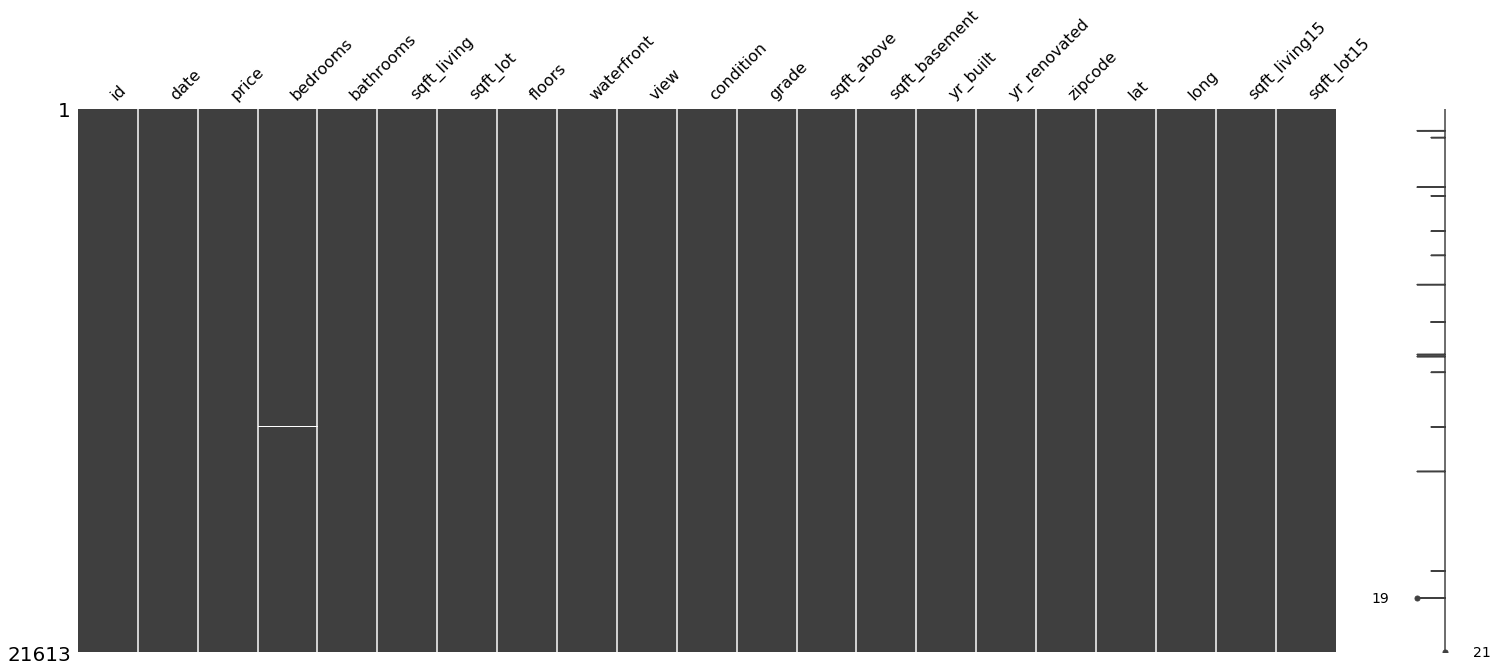

In [8]:
info = BasicInfo(df_house).all_call()
info

Now we know there is unused columun like Unamed 0 and wrong type of data like date is object type, there some missing values which very little, and also very small correlation which we execute later.

In [3]:
df_house.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#Percentage null
((df_house.isna().sum() / len(df_house))*100).to_frame(name='Column')

,Column
Unnamed: 0,0.000000
id,0.000000
date,0.000000
price,0.000000
bedrooms,0.060149
bathrooms,0.046268
sqft_living,0.000000
sqft_lot,0.000000
floors,0.000000
waterfront,0.000000


In [5]:
#Drop null values
df_house_fix = df_house.dropna()

In [6]:
df_house_fix.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#Check null again
df_house_fix.isna().sum().to_frame('Total Null')

,Total Null
Unnamed: 0,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0


In [8]:
unik = [len(df_house_fix[u].unique()) for u in df_house_fix.columns.values]
unik

[21597,
 21420,
 372,
 4024,
 12,
 29,
 1034,
 9776,
 6,
 2,
 5,
 5,
 11,
 942,
 306,
 116,
 70,
 70,
 5033,
 751,
 777,
 8682]

In [9]:
#Try to find total unique value for turn it into categorical data type
pd.DataFrame({'Columns':df_house_fix.columns.values, 'Total Unique' :unik})

,Columns,Total Unique
0,Unnamed: 0,21597
1,id,21420
2,date,372
3,price,4024
4,bedrooms,12
5,bathrooms,29
6,sqft_living,1034
7,sqft_lot,9776
8,floors,6
9,waterfront,2


from data we know that some of columns can be convert into categorical from int type likes bedrooms. bathrooms, floors, waterfront, view, condition, grade and zipcode.

In [10]:
#preventing loss/error we copy df
backup_df_house = df_house_fix[:]
backup_df_house

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
#Change date time from object into date time
df_house_fix['date'] = pd.to_datetime(df_house_fix['date'])

C:\Users\Jey\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df_house_fix.drop(columns = 'Unnamed: 0', inplace=True)

C:\Users\Jey\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
df_house_fix.to_csv('df_house.csv')

In [14]:
#Since we want to predict price we find correleation of price with all features / columns
df_house_fix.corr()['price'].to_frame().sort_values(by=['price'], ascending=False)

,price
price,1.000000
sqft_living,0.701909
grade,0.667922
sqft_above,0.605371
sqft_living15,0.585247
bathrooms,0.525905
view,0.397318
sqft_basement,0.323776
bedrooms,0.308794
lat,0.306777


In [21]:
df_house_fix.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

In [28]:
df_house_fix['year'] = pd.DatetimeIndex(df_house_fix['date']).year
df_house_fix

C:\Users\Jey\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [286]:
X = df_house_fix.drop(columns=['id', 'date', 'lat', 'long', 'sqft_lot15', 'sqft_living15'])

In [287]:
#let assume that house never rennovated replace with year built
X['renovated'] = X.yr_renovated.replace(0, X.yr_built)

In [288]:
#If we had a house renovated in 2014 and sold in 2015 it will answer -1, and if never renov it become age of house
X.renovated = X.renovated-X.year

In [289]:
#Drop unnecessary
X.drop(columns=['year', 'yr_built', 'yr_renovated'], inplace=True)

In [290]:
X

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,-59
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,-23
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,98028,-82
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,-49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,-5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,-1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,-5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,-11


In [291]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bedrooms            1.00
bathrooms           0.75
sqft_living      1120.00
sqft_lot         5645.00
floors              1.00
                 ...    
98178               0.00
98188               0.00
98198               0.00
98199               0.00
price          323000.00
Length: 83, dtype: float64


In [416]:
#this is what left :(
dataset_cleared_iqr = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_cleared_iqr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,-23
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,-49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,-28
6,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,98003,-19
7,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,98198,-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,-5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,-1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,-5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,-11


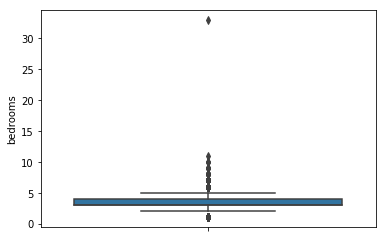

In [293]:
#Before IQR
import seaborn as sns
sns.boxplot(y='bedrooms', data=X)

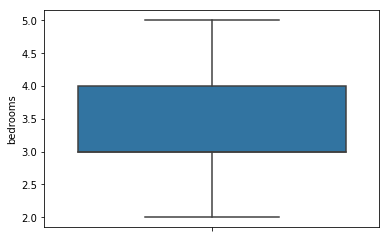

In [294]:
#Before IQR
sns.boxplot(y='bedrooms', data=dataset_cleared_iqr)

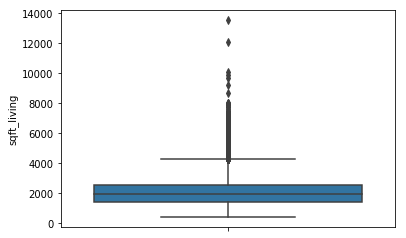

In [295]:
#Before IQR
sns.boxplot(y=X.sqft_living)

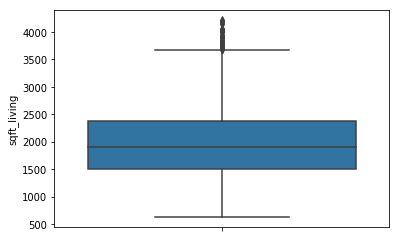

In [296]:
#After IQR Outliers reduced!
sns.boxplot(y=dataset_cleared_iqr.sqft_living)

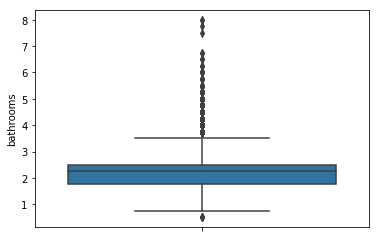

In [297]:
#Before IQR
sns.boxplot(y=X.bathrooms)

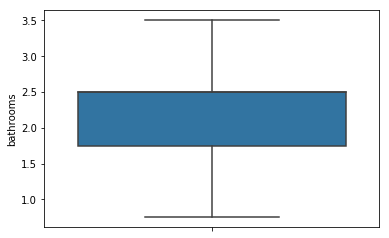

In [298]:
#After IQR
sns.boxplot(y=dataset_cleared_iqr.bathrooms)

In [417]:
#Let's try clean outlier using z score
df_zscore = dataset_cleared_iqr[:]
df_zscore

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,-23
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,-49
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,-28
6,257500.0,3.0,2.25,1715,6819,2.0,0,0,3,7,1715,0,98003,-19
7,291850.0,3.0,1.50,1060,9711,1.0,0,0,3,7,1060,0,98198,-52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,-5
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,-1
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,-5
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,-11


In [418]:
#theres problem with waterfront and view
z = (df_zscore - df_zscore.mean()) / df_zscore.std()
z

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
1,0.545531,-0.518553,0.028920,0.980434,0.031620,0.637713,NaN,NaN,-0.519967,-0.853689,0.642447,0.579711,1.307363,0.056864
3,0.916150,0.873230,1.411511,-0.016805,-0.581605,-1.093052,NaN,NaN,3.251272,-0.853689,-1.142522,2.083467,1.539439,-1.573534
4,0.388299,-0.518553,-0.431944,-0.474554,0.260828,-1.093052,NaN,NaN,-0.519967,0.465649,-0.138477,-0.599705,0.231372,-0.256674
6,-1.029599,-0.518553,0.028920,-0.417336,-0.084078,0.637713,NaN,NaN,-0.519967,-0.853689,-0.082697,-0.599705,-1.266576,0.307694
7,-0.836709,-0.518553,-1.353671,-1.488142,0.706934,-1.093052,NaN,NaN,-0.519967,-0.853689,-1.126584,-0.599705,2.847506,-1.761657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.454017,-0.518553,0.489784,-0.719777,-1.639843,2.368477,NaN,NaN,-0.519967,0.465649,-0.377535,-0.599705,0.843210,1.185600
21609,-0.229399,0.873230,0.489784,0.555381,-0.359236,0.637713,NaN,NaN,-0.519967,0.465649,0.865568,-0.599705,1.750417,1.436431
21610,-0.217601,-1.910335,-2.736262,-1.553535,-1.579943,0.637713,NaN,NaN,-0.519967,-0.853689,-1.190333,-0.599705,1.708222,1.185600
21611,-0.229399,-0.518553,0.489784,-0.605340,-1.296032,0.637713,NaN,NaN,-0.519967,0.465649,-0.265975,-0.599705,-0.760227,0.809355


In [419]:
#Because they are boolean, they become NaN so replace with deafult value
z.waterfront = df_zscore.waterfront
z.view = df_zscore.view
z

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,renovated
1,0.545531,-0.518553,0.028920,0.980434,0.031620,0.637713,0,0,-0.519967,-0.853689,0.642447,0.579711,1.307363,0.056864
3,0.916150,0.873230,1.411511,-0.016805,-0.581605,-1.093052,0,0,3.251272,-0.853689,-1.142522,2.083467,1.539439,-1.573534
4,0.388299,-0.518553,-0.431944,-0.474554,0.260828,-1.093052,0,0,-0.519967,0.465649,-0.138477,-0.599705,0.231372,-0.256674
6,-1.029599,-0.518553,0.028920,-0.417336,-0.084078,0.637713,0,0,-0.519967,-0.853689,-0.082697,-0.599705,-1.266576,0.307694
7,-0.836709,-0.518553,-1.353671,-1.488142,0.706934,-1.093052,0,0,-0.519967,-0.853689,-1.126584,-0.599705,2.847506,-1.761657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.454017,-0.518553,0.489784,-0.719777,-1.639843,2.368477,0,0,-0.519967,0.465649,-0.377535,-0.599705,0.843210,1.185600
21609,-0.229399,0.873230,0.489784,0.555381,-0.359236,0.637713,0,0,-0.519967,0.465649,0.865568,-0.599705,1.750417,1.436431
21610,-0.217601,-1.910335,-2.736262,-1.553535,-1.579943,0.637713,0,0,-0.519967,-0.853689,-1.190333,-0.599705,1.708222,1.185600
21611,-0.229399,-0.518553,0.489784,-0.605340,-1.296032,0.637713,0,0,-0.519967,0.465649,-0.265975,-0.599705,-0.760227,0.809355


In [399]:
#Outliers with z score >3
df_zscore[z > 3].count()

bedrooms           0
bathrooms          0
sqft_living       23
sqft_lot          49
floors             5
waterfront         0
view               0
condition        379
grade              0
sqft_above        15
sqft_basement    119
zipcode            0
renovated          0
dtype: int64

In [421]:
#Outliers with z score < -3
df_zscore[z < - 3].count()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
renovated        0
dtype: int64

In [422]:
#Final data shrinking 600 rows :(
df_zscore = df_zscore[~(z > 3)].dropna()
df_zscore.shape

(9539, 14)

In [423]:
#zipcode is mean some location a little xpensive or cheap, so one hot encoding the zip code
zipcod = pd.get_dummies(df_zscore.zipcode)

In [424]:
#Merge the zipcoe with df z score
df_result = pd.concat([df_zscore, zipcod], axis=1)
df_result

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3.0,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3.0,8,...,0,0,0,0,0,0,0,0,0,0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0,0,3.0,7,...,0,0,0,0,0,0,0,0,0,0
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,0,0,3.0,7,...,0,0,0,0,0,0,0,0,1,0
9,323000.0,3.0,2.50,1890.0,6560.0,2.0,0,0,3.0,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,3.0,8,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,3.0,8,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,3.0,7,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,3.0,8,...,0,0,0,0,0,0,0,0,0,0


In [434]:
#its time to preprocessing with standard scaler sklearn.preprocessing import StandardScaler minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
XZ = StandardScaler().fit_transform(df_result.drop(columns='price'))
XZ

array([[-0.4951021 ,  0.03140674,  1.04096036, ..., -0.07111556,
        -0.10800989, -0.07684598],
       [-0.4951021 , -0.43524256, -0.45720988, ..., -0.07111556,
        -0.10800989, -0.07684598],
       [-0.4951021 ,  0.03140674, -0.39829308, ..., -0.07111556,
        -0.10800989, -0.07684598],
       ...,
       [-1.90194719, -2.76848904, -1.56821254, ..., -0.07111556,
        -0.10800989, -0.07684598],
       [-0.4951021 ,  0.49805603, -0.59187687, ..., -0.07111556,
        -0.10800989, -0.07684598],
       [-1.90194719, -2.76848904, -1.56821254, ..., -0.07111556,
        -0.10800989, -0.07684598]])

In [454]:
#Spliting data with train test split
X_train, X_test, y_train, y_test = train_test_split(XZ, df_result.price, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7631, 83) (7631,) (1908, 83) (1908,)


In [480]:
#Importing modules
#Prepocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

#Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Pipeline and Cross Validation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Model Evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [455]:
#try  with random forest
RF_zscore = RandomForestRegressor()
RF_zscore.fit(X_train, y_train)
print('R^2 Training :', RF_zscore.score(X_train, y_train))
print('R^2 Testing :', RF_zscore.score(X_test, y_test))
print('MSE Training :', mse(y_train, RF_zscore.predict(X_train)))
print('MSE Testing :', mse(y_test, RF_zscore.predict(X_test)))

R^2 Training : 0.9794683597173094
R^2 Testing : 0.8442787279648034
MSE Training : 586481792.138058
MSE Testing : 4245505468.009653


In [459]:
#try with linear regression
LR_Z = LinearRegression(n_jobs=-1)
LR_Z.fit(X_train, y_train)
print('R^2 Training :', LR_Z.score(X_train, y_train))
print('R^2 Testing :', LR_Z.score(X_test, y_test))
print(mse(y_train, LR_Z.predict(X_train)))
print(mse(y_test, LR_Z.predict(X_test)))

R^2 Training : 0.8552505173031523
R^2 Testing : 0.8436139844215345
4134737159.5378
4263628697.4881167


In [495]:
#Try with XGB
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred_train_xgb = XGB.predict(X_train)
y_pred_test_xgb = XGB.predict(X_test)
print('R^2 Training Default:', XGB.score(X_train, y_train))
print('R^2 Testing Default :', XGB.score(X_test, y_test))
print(mse(y_train, y_pred_train_xgb))
print(mse(y_test, y_pred_test_xgb))
print('R^2 Training with scikit :', r2(y_train, y_pred_train_xgb))
print('R^2 Testing with scikit:', r2(y_test, y_pred_test_xgb))

R^2 Training Default: 0.9512964733773526
R^2 Testing Default : 0.8692061670512454
1391205533.694004
3565896461.726638
R^2 Training with scikit : 0.9512964733773526
R^2 Testing with scikit: 0.8692061670512454


In [468]:
#Try with Decision Tree
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
print('R^2 Training :', DT.score(X_train, y_train))
print('R^2 Testing :', DT.score(X_test, y_test))
print('MSE Training :', mse(y_train, DT.predict(X_train)))
print('MSE Testing :', mse(y_test, DT.predict(X_test)))

R^2 Training : 0.9995888438881253
R^2 Testing : 0.7342972315289515
MSE Training : 11744583.969947144
MSE Testing : 7243984984.621593


In [503]:
#Try with neural Network
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape = (X_train.shape[1],)))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [504]:
from keras.models import Sequential
from keras.layers import Dense

baseline_model().fit(X_train, y_train, epochs = 1000, batch_size=100)
y_pred_train = baseline_model().predict(X_train)
y_pred_test = baseline_model().predict(X_test)

print('R^2 Training :', r2(y_train, y_pred_train))
print('R^2 Testing :',  r2(y_test, y_pred_test))
print('MSE Training :', mse(y_train, y_pred_train))
print('MSE Testing :', mse(y_test, y_pred_test))

Epoch 1/1000
7631/7631 [==============================] - 0s 50us/step - loss: 215874993209.8357
Epoch 2/1000
7631/7631 [==============================] - 0s 19us/step - loss: 215868951788.5760
Epoch 3/1000
7631/7631 [==============================] - 0s 18us/step - loss: 215858936851.1891
Epoch 4/1000
7631/7631 [==============================] - 0s 17us/step - loss: 215843479437.1338
Epoch 5/1000
7631/7631 [==============================] - 0s 18us/step - loss: 215821708862.7336
Epoch 6/1000
7631/7631 [==============================] - 0s 16us/step - loss: 215793051464.6971
Epoch 7/1000
7631/7631 [==============================] - 0s 17us/step - loss: 215757076879.0796
Epoch 8/1000
7631/7631 [==============================] - 0s 17us/step - loss: 215714093284.3905
Epoch 9/1000
7631/7631 [==============================] - 0s 16us/step - loss: 215664272200.5630
Epoch 10/1000
7631/7631 [==============================] - 0s 16us/step - loss: 215607600545.7319
Epoch 11/1000
7631/7631 [====

Text(0.5, 1.0, 'Test Data vs Prediction Data using Tensorflow')

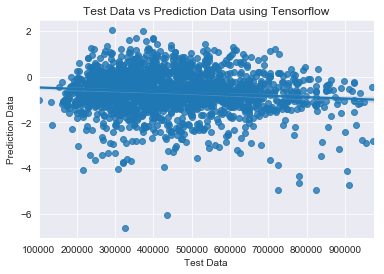

In [507]:
sns.set_style('darkgrid')
sns.regplot(y_test, y_pred_test)
plt.xlabel('Test Data')
plt.ylabel('Prediction Data')
plt.title('Test Data vs Prediction Data using Tensorflow')

Let's see the result

In [660]:
#Result Algorithms
df_res = pd.read_csv('C:\\Users\\Jey\\Downloads\\c.csv')
df_res

,Algorithm,MSE_TRAIN,MSE_TEST,R2_TRAIN,R2_TEST
0,RandomForest,6.243915e+08,4.187847e+09,0.97,0.84
1,LinearRegression,4.134737e+09,4.263629e+09,0.85,0.84
2,DecisionTree,1.174458e+07,7.243985e+09,0.99,0.73
3,XtremeGradientBoost,1.391206e+09,3.565896e+09,0.95,0.86
4,Tensorflow,2.160000e+11,2.170000e+11,-6.55,-6.97


Text(0.5, 1.0, 'R^2 Comparison of Machine Learning Algorithm')

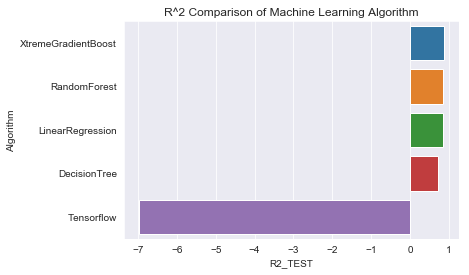

In [661]:
#Comparison of Machine Learning Algorithm R2(Coefficient Determination)
sns.barplot(y='Algorithm', x='R2_TEST', data=df_res.sort_values(by=['R2_TEST'], ascending=False))
plt.title('R^2 Comparison of Machine Learning Algorithm')

In [675]:
#Sorting MSE for better look
df_res_mse = df_res.sort_values(by=[' MSE_TEST ', 'Algorithm'], ascending=False)
df_res_mse.reset_index(inplace=True)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

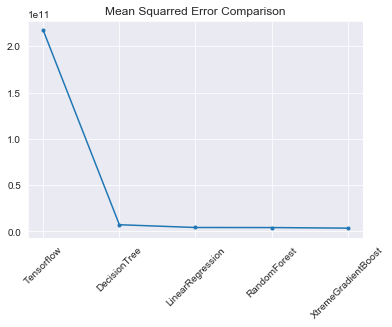

In [688]:
#Mse Plotting XGB works well here
plt.plot(df_res_mse['Algorithm'], df_res_mse[' MSE_TEST '], marker='.')
plt.title('Mean Squarred Error Comparison')
plt.xticks(rotation=45)

Ok, XGBoost work well with the data lets hyperparameter it!
Trying with 80:20, 75:25, 66:33 spliting Data

In [580]:
#XGBoost hyper-parameter tuning
class XGBOOSTED():
    def __init__(self, X, y, size):
        self.X = X
        self.y = y
        self.size = size
        
    #XGBoost hyper-parameter tuning
    def hyperParameterTuning(self):
        param_tuning = {
            'learning_rate': [0.1, 0.01],
            'max_depth': [3, 5, 7, 10],
            'min_child_weight': [5, 3, 1],
            'subsample': [0.7, 0.5],
            'colsample_bytree': [0.7, 0.5],
            'n_estimators' : [100, 200, 500],
            'objective': ['reg:squarederror']
                        }

        xgb_model = XGBRegressor()

        gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
        X_train, X_test, y_train, y_test =  train_test_split(XZ, df_result.price, test_size=self.size)
        gsearch.fit(X_train,y_train)
        return gsearch
    

In [581]:
xgb20 = XGBOOSTED(XZ, df_result.price, 0.2).hyperParameterTuning()
xgb20

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 46.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 52.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.5],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 7, 10],
      

In [593]:
xgb20.best_score_

0.8765319432090376

In [582]:
xgb33 = XGBOOSTED(XZ, df_result.price, 0.33).hyperParameterTuning()
xgb33

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 41.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.5],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 7, 10],
      

In [603]:
xgb33.best_score_

0.8747123925186807

In [583]:
xgb25 = XGBOOSTED(XZ, df_result.price, 0.25).hyperParameterTuning()
xgb25

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 45.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.5],
                         'learning_rate': [0.1, 0.01],
                         'max_depth': [3, 5, 7, 10],
      

In [605]:
xgb25.best_score_

0.8812551925532913

In [609]:
#lets predict data!
X_train, X_test, y_train, y_test =  train_test_split(XZ, df_result.price, test_size=0.25)
y_pred_xgb25_train = xgb25.predict(X_train)
y_pred_xgb25_test = xgb25.predict(X_test)

print(mse(y_train, y_pred_xgb25_train))
print(mse(y_test, y_pred_xgb25_test))

1926264802.8038278
1673648684.7142432


Text(0.5, 1.0, 'Test Data vs Prediction Data using XGBoost')

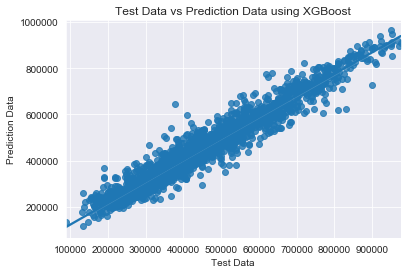

In [610]:
sns.set_style('darkgrid')
sns.regplot(y_test, y_pred_xgb25_test)
plt.xlabel('Test Data')
plt.ylabel('Prediction Data')
plt.title('Test Data vs Prediction Data using XGBoost')

In [632]:
X_train, X_test, y_train, y_test =  train_test_split(XZ, df_result.price, test_size=0.2)
y_pred_xgb20_train = xgb20.predict(X_train)
y_pred_xgb20_test = xgb20.predict(X_test)

print(mse(y_train, y_pred_xgb20_train))
print(mse(y_test, y_pred_xgb20_test))

1758624233.546057
1623813300.9322765


Text(0.5, 1.0, 'Test Data vs Prediction Data using XGBoost')

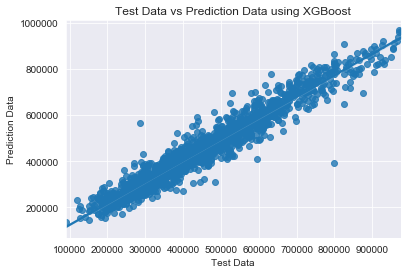

In [633]:
sns.set_style('darkgrid')
sns.regplot(y_test, y_pred_xgb20_test)
plt.xlabel('Test Data')
plt.ylabel('Prediction Data')
plt.title('Test Data vs Prediction Data using XGBoost')

In [690]:
#lets predict data!
X_train, X_test, y_train, y_test =  train_test_split(XZ, df_result.price, test_size=0.33)
y_pred_xgb33_train = xgb33.predict(X_train)
y_pred_xgb33_test = xgb33.predict(X_test)

print(mse(y_train, y_pred_xgb33_train))
print(mse(y_test, y_pred_xgb33_test))

2070340694.2378547
1821301627.2844918


Text(0.5, 1.0, 'Test Data vs Prediction Data using XGBoost')

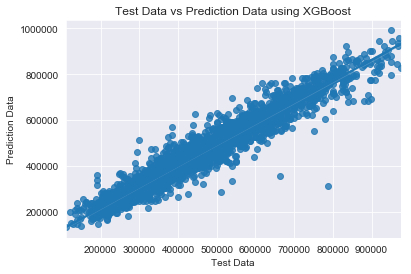

In [691]:
sns.set_style('darkgrid')
sns.regplot(y_test, y_pred_xgb33_test)
plt.xlabel('Test Data')
plt.ylabel('Prediction Data')
plt.title('Test Data vs Prediction Data using XGBoost')

In [616]:
def error_plot(algorithm_list, X, y, test_list):
    error_list_test = []
    
    for p, q in zip(algorithm_list, test_list):
        X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=q)
        y_prediction = p.predict(X_test)
        error_list_test.append(mse(y_test, y_prediction))
    return error_list_test

In [619]:
lst_alg = [xgb33, xgb25, xgb20]
tst = [0.33, 0.25, 0.2]

err = error_plot(lst_alg , XZ, df_result.price, tst)
err

[1994239849.3888202, 1753566965.9673903, 1665173225.1363041]

Text(0.5, 1.0, 'Error in each XGBoost Data Size')

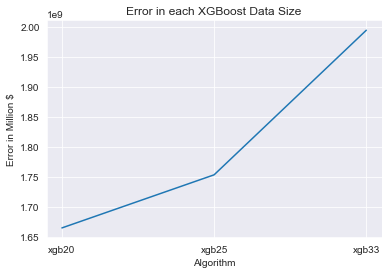

In [630]:
sns.lineplot(x=['xgb33', 'xgb25', 'xgb20'], y=err)
plt.xlabel('Algorithm')
plt.ylabel('Error in Million $')
plt.title('Error in each XGBoost Data Size')

In [626]:
lst_r2 = []
for alg in lst_alg:
    lst_r2.append(alg.best_score_)
    
lst_r2

[0.8747123925186807, 0.8812551925532913, 0.8765319432090376]

Text(0.5, 1.0, 'R2 in each XGBoost Data Size')

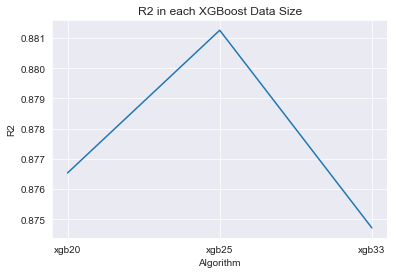

In [631]:
sns.lineplot(x=['xgb33', 'xgb25', 'xgb20'], y=lst_r2)
plt.xlabel('Algorithm')
plt.ylabel('R2')
plt.title('R2 in each XGBoost Data Size')